### 0. Nalaganje besedila in locitev na posamezne besede

In [104]:
from colorama import Fore

textfile = open("./cankar/Hiša_Marije_Pomočnice.txt")
text = textfile.read()
spacesplit = text.split()
spacesplit

punctuation = ["...", ".",",","!","?", "—", ";", ":", "—<<", "‛"]
finalsplit = []
for word in spacesplit:
    match = [mark for mark in punctuation if (mark in word) and word not in punctuation]
    if match:
        #print(f"{Fore.RED}{match[0]} in: {Fore.RESET}{word}")
        new = [word[:-1], word[-1]]
        #print(f"{Fore.GREEN}{new}")
        for element in new:
            if element != "":
                finalsplit.append(element)
    else:
        finalsplit.append(word)
finalsplit

['Hiša',
 'Marije',
 'Pomočnice',
 'Ivan',
 'Cankar',
 'I',
 '.',
 'Tiho',
 'so',
 'se',
 'zaprla',
 'velika',
 'železna',
 'vrata',
 ';',
 'v',
 'mračnem',
 'hodniku',
 ',',
 'na',
 'mrzlih',
 'stenah',
 'je',
 'zasijalo',
 'za',
 'hip',
 'jesensko',
 'sonce',
 '.',
 'Za',
 'steklenimi',
 'durmi',
 ',',
 'v',
 'sobi',
 'vratarnice',
 ',',
 'je',
 'gorela',
 'rdeča',
 'luč',
 'z',
 'dolgim',
 ',',
 'mirnim',
 'plamenom',
 ';',
 'nad',
 'svetilko',
 'je',
 'bilo',
 'pribito',
 'na',
 'steni',
 'razpelo',
 'z',
 'golim',
 ',',
 'vse',
 'krvavim',
 'telesom',
 'križanega',
 'Kristusa',
 ',',
 'ki',
 'še',
 'ni',
 'bil',
 'nagnil',
 'glave',
 'in',
 'je',
 'gledal',
 'z',
 'velikimi',
 'mirnimi',
 'očmi',
 '.',
 'Malči',
 'je',
 'vztrepetala',
 'v',
 'materinem',
 'naročju',
 'in',
 'se',
 'je',
 'prekrižala',
 '.',
 'Izza',
 'steklenih',
 'duri',
 'je',
 'stopila',
 'vratarica',
 ',',
 'mlada',
 ',',
 'šepava',
 'ženska',
 '.',
 'Nasmehnila',
 'se',
 'je',
 ',',
 'kakor',
 'se',
 'smehlja

In [40]:
print(f"Len default split: {Fore.RED}{len(spacesplit)} {Fore.RESET}| Len additional filtering: {Fore.GREEN}{len(finalsplit)}")

Len default split: 30116 | Len additional filtering: 35591


### 1. Frekvence in ocene lastnih verjetnosti besed

In [41]:
from collections import Counter
import numpy as np
from decimal import Decimal, getcontext
getcontext().prec = 100

count = Counter(finalsplit)
all_words = count.total()
word_probabilities = {word: Decimal(count / all_words) for word, count in count.items()}
keylist = list(word_probabilities.keys())
vallist = list(word_probabilities.values())

topitems = count.most_common(5)
print(f"{Fore.GREEN}Most probable:\n------------------------------------------")
for word, num in topitems:
    probability = num/all_words
    print(f"{Fore.BLUE}Word: {Fore.RESET}{word} ({num}) | {Fore.GREEN}Prob: {Fore.RESET}{probability}")
botitems = count.most_common()[:-6:-1]
print(f"{Fore.RED}\nLeast probable:\n------------------------------------------")
for word, num in botitems:
    probability = num/all_words
    print(f"{Fore.BLUE}Word: {Fore.RESET}{word} ({num}) | {Fore.RED}Prob: {Fore.RESET}{probability}")

probs = np.array(vallist)
geometric_mid = np.sqrt(probs.max()**2 - probs.min()**2)
geometric_mid

smaller = [prob for prob in probs if prob < geometric_mid]

if smaller:
    closest_smaller = max(smaller, key=lambda x: x - geometric_mid)
    word = keylist[vallist.index(closest_smaller)]
    print(f"\n{Fore.LIGHTMAGENTA_EX}Closest in probability to the geometric avg:\n------------------------------------------")
    print(f"{Fore.BLUE}Word: {Fore.RESET}{word} ({count[word]}) | {Fore.RED}Prob: {Fore.RESET}{closest_smaller}")
else:
    print(f"No number greater than {geometric_mid} found.")


Most probable:
------------------------------------------
Word: , (3291) | Prob: 0.09246719676322666
Word: je (3026) | Prob: 0.08502149419797139
Word: in (1392) | Prob: 0.039111011210699334
Word: . (1315) | Prob: 0.03694754291815346
Word: se (1148) | Prob: 0.032255345452502034

Least probable:
------------------------------------------
Word: pričakovani (1) | Prob: 2.8096990812284005e-05
Word: ljubljeni (1) | Prob: 2.8096990812284005e-05
Word: ženin (1) | Prob: 2.8096990812284005e-05
Word: spleteni (1) | Prob: 2.8096990812284005e-05
Word: žarkov (1) | Prob: 2.8096990812284005e-05

Closest in probability to the geometric avg:
------------------------------------------
Word: je (3026) | Prob: 0.085021494197971392292600967266480438411235809326171875


In [42]:
word_probabilities

{'Hiša': Decimal('0.00002809699081228400486111122791310634738692897371947765350341796875'),
 'Marije': Decimal('0.00002809699081228400486111122791310634738692897371947765350341796875'),
 'Pomočnice': Decimal('0.00002809699081228400486111122791310634738692897371947765350341796875'),
 'Ivan': Decimal('0.00002809699081228400486111122791310634738692897371947765350341796875'),
 'Cankar': Decimal('0.00002809699081228400486111122791310634738692897371947765350341796875'),
 'I': Decimal('0.00002809699081228400486111122791310634738692897371947765350341796875'),
 '.': Decimal('0.036947542918153462865316072338828234933316707611083984375'),
 'Tiho': Decimal('0.000196678935685988044192173962443348500528372824192047119140625'),
 'so': Decimal('0.0220561377876429438871230814811497111804783344268798828125'),
 'se': Decimal('0.032255345452502033609665232916086097247898578643798828125'),
 'zaprla': Decimal('0.0000561939816245680097222224558262126947738579474389553070068359375'),
 'velika': Decimal('0.000

### 2. Ocena sledenja Zipfovemu zakonu

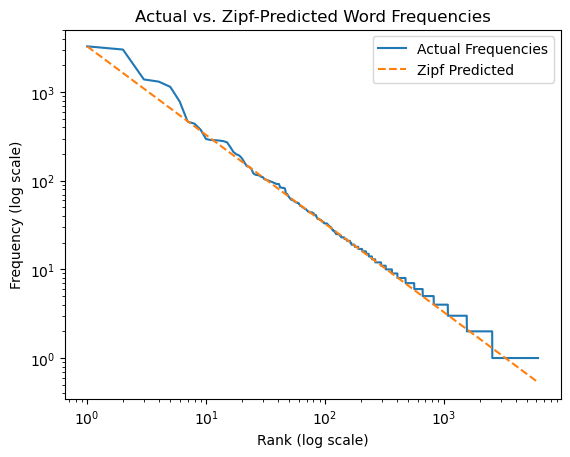

In [71]:
import matplotlib.pyplot as plt

# nopunctuation = []
# for word in finalsplit:
#     if word not in punctuation:
#         nopunctuation.append(word)
nopunctuation = finalsplit

nopunct_count = Counter(nopunctuation)
sortedcount = nopunct_count.most_common()
_, countlist = zip(*sortedcount)
countlist

ranks = range(1, len(countlist) + 1)  # Ranks: 1, 2, 3, ...

# Calculate Zipf's predicted frequencies
C = countlist[0]  # Normalization constant (highest frequency)
zipf_predicted = [C / rank for rank in ranks]

# Plot actual frequencies
plt.plot(ranks, countlist, label='Actual Frequencies')

# Plot Zipf-predicted frequencies
plt.plot(ranks, zipf_predicted, linestyle='--', label='Zipf Predicted')

# Use log-log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and legend
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Actual vs. Zipf-Predicted Word Frequencies')
plt.legend()

# Show plot
plt.show()




In [72]:
correlation = np.corrcoef(countlist, zipf_predicted)[0,1]
correlation

0.9653574983468663

### 3. Pogojne verjetnosti vseh besed glede na prejsnjo besedo
$P(w_2 | w_1)$

$P(w_1 ∣ w_2)=\frac{C(w_1,w_2)}{C(w_2)}$

${\displaystyle P(A\cap B\cap C)=P(A)P(B|A)P(C|A\cap B)\!}.$

In [73]:
bigrams = [(nopunctuation[i], nopunctuation[i+1]) for i in range(len(nopunctuation)-1)]
trigrams = [(nopunctuation[i], nopunctuation[i+1], nopunctuation[i+2]) for i in range(len(nopunctuation)-2)]
quadgrams = [(nopunctuation[i], nopunctuation[i+1], nopunctuation[i+2], nopunctuation[i+3]) for i in range(len(nopunctuation)-3)]

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)
quadgram_counts = Counter(quadgrams)
total_bigrams = bigram_counts.total()
total_trigrams = trigram_counts.total()
total_quadgrams = quadgram_counts.total()
total_nopunct = nopunct_count.total()

bigram_probs = {bigram: count / total_bigrams for bigram, count in bigram_counts.items()}
trigram_probs = {trigram: count / total_trigrams for trigram, count in trigram_counts.items()}
quadgram_probs = {quadgram: count / total_quadgrams for quadgram, count in quadgram_counts.items()}
nopunct_probs = {word: count / total_nopunct for word, count in nopunct_count.items()}

condprobs_bi = {}
condprobs_tri = {}
condprobs_quad = {}
for (word1, word2), prob in bigram_probs.items():
    condprobs_bi[(word1, word2)] = prob/nopunct_probs[word1]

for (word1, word2, word3), prob in trigram_probs.items():
    condprobs_tri[(word1,word2, word3)] = prob/(nopunct_probs[word1]*condprobs_bi[(word1,word2)])

for (word1, word2, word3, word4), prob in quadgram_probs.items():
    condprobs_quad[(word1, word2, word3, word4)] = prob/(nopunct_probs[word1]*condprobs_bi[(word1,word2)]*condprobs_tri[(word1, word2, word3)])

In [74]:
condprobs_quad

{('Hiša', 'Marije', 'Pomočnice', 'Ivan'): 7.895296244621291e-10,
 ('Marije', 'Pomočnice', 'Ivan', 'Cankar'): 7.895296244621291e-10,
 ('Pomočnice', 'Ivan', 'Cankar', 'I'): 7.895296244621291e-10,
 ('Ivan', 'Cankar', 'I', '.'): 7.895296244621291e-10,
 ('Cankar', 'I', '.', 'Tiho'): 7.895296244621291e-10,
 ('I', '.', 'Tiho', 'so'): 7.895296244621291e-10,
 ('.', 'Tiho', 'so', 'se'): 3.158118497848516e-09,
 ('Tiho', 'so', 'se', 'zaprla'): 1.5790592489242581e-09,
 ('so', 'se', 'zaprla', 'velika'): 1.5395827677011516e-07,
 ('se', 'zaprla', 'velika', 'železna'): 7.89529624462129e-10,
 ('zaprla', 'velika', 'železna', 'vrata'): 7.895296244621291e-10,
 ('velika', 'železna', 'vrata', ';'): 7.89529624462129e-10,
 ('železna', 'vrata', ';', 'v'): 1.5790592489242581e-09,
 ('vrata', ';', 'v', 'mračnem'): 1.579059248924258e-09,
 (';', 'v', 'mračnem', 'hodniku'): 3.9476481223106455e-09,
 ('v', 'mračnem', 'hodniku', ','): 1.5790592489242581e-09,
 ('mračnem', 'hodniku', ',', 'na'): 7.89529624462129e-10,
 ('h

### 4. Entropije

#### 4.1 Enaka verjetnost vseh besed

In [75]:
prob = 1/len(nopunctuation)
H = 0
for i in range(len(nopunctuation)):
    H -= prob * np.log2(prob)

H

15.119224848366144

#### 4.2 Dejanska verjetnost vseh besed

In [76]:
H = 0
for prob in nopunct_probs.values():
    H -= prob * np.log2(prob)
H

8.97538189850892

#### 4.3 Pogojna verjetnost parov besed

In [77]:
H = 0
for prob in condprobs_bi.values():
    H -= prob * np.log2(prob)
H

3847.5212864518953

#### 4.4 Pogojna verjetnost trojic besed

In [78]:
H = 0
for prob in condprobs_tri.values():
    H -= prob * np.log2(prob)
H

0.3961324873417868

### 5. Simulacija markovega vira

In [79]:
import random

first_word = random.choice(nopunctuation)
first_word

'tuje'

#### 5.1: S predikcijo naslednje besed na podlagi prejsnje

In [80]:
newtext = [first_word]
for i in range(len(nopunctuation)):
    possible_next = {}
    for (w1, w2), prob in condprobs_bi.items():
        if w1 == first_word:
            if i == 0:
                print(f"{Fore.GREEN}W1: {w1}{Fore.RESET} | W2: {w2} | {Fore.CYAN}P: {prob}")
            possible_next[w2] = prob
    
    problist_next = np.array(possible_next.values())
    wordlist_next = np.array(list(possible_next.keys()))
    next_word = wordlist_next[problist_next.argmax()]
    print(next_word)
    newtext.append(next_word)
    first_word=next_word

newtext

W1: tuje | W2: bonbone | P: 0.5000140488901377
W1: tuje | W2: , | P: 0.5000140488901377
bonbone
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem
hodniku
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem
hodniku
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem
hodniku
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem
hodniku
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem
hodniku
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem
hodniku
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem
hodniku
,
na
mrzlih
stenah
je
zasijalo
za
hip
jesensko
sonce
.
Tiho
so
se
zaprla
velika
železna
vrata
;
v
mračnem


['tuje',
 'bonbone',
 ',',
 'na',
 'mrzlih',
 'stenah',
 'je',
 'zasijalo',
 'za',
 'hip',
 'jesensko',
 'sonce',
 '.',
 'Tiho',
 'so',
 'se',
 'zaprla',
 'velika',
 'železna',
 'vrata',
 ';',
 'v',
 'mračnem',
 'hodniku',
 ',',
 'na',
 'mrzlih',
 'stenah',
 'je',
 'zasijalo',
 'za',
 'hip',
 'jesensko',
 'sonce',
 '.',
 'Tiho',
 'so',
 'se',
 'zaprla',
 'velika',
 'železna',
 'vrata',
 ';',
 'v',
 'mračnem',
 'hodniku',
 ',',
 'na',
 'mrzlih',
 'stenah',
 'je',
 'zasijalo',
 'za',
 'hip',
 'jesensko',
 'sonce',
 '.',
 'Tiho',
 'so',
 'se',
 'zaprla',
 'velika',
 'železna',
 'vrata',
 ';',
 'v',
 'mračnem',
 'hodniku',
 ',',
 'na',
 'mrzlih',
 'stenah',
 'je',
 'zasijalo',
 'za',
 'hip',
 'jesensko',
 'sonce',
 '.',
 'Tiho',
 'so',
 'se',
 'zaprla',
 'velika',
 'železna',
 'vrata',
 ';',
 'v',
 'mračnem',
 'hodniku',
 ',',
 'na',
 'mrzlih',
 'stenah',
 'je',
 'zasijalo',
 'za',
 'hip',
 'jesensko',
 'sonce',
 '.',
 'Tiho',
 'so',
 'se',
 'zaprla',
 'velika',
 'železna',
 'vrata',
 ';',

#### 5.2: S predikcijo naslednje besede na podlagi prejsnjih 3

In [86]:
def generate_text(first_words:tuple, method:str="deterministic", temperature:float=1.0)->list:
    available_metods = ["deterministic", "random","temperature"]
    if method not in available_metods:
        raise ValueError(f"Method: {method} is invalid, should be one of: {available_metods}")
    newtext = list(first_words)
    first_word = newtext[0]
    second_word = newtext[1]
    third_word = newtext[2]
    for i in range(len(trigrams)):
        possible_next = {}
        for (w1, w2, w3, w4), prob in condprobs_quad.items():
            if (w1,w2,w3) == (first_word,second_word,third_word):
                if i == 0:
                    print(f"{Fore.GREEN}W1: {w1} | W2: {w2} | W3: {w3} {Fore.RESET}| W4: {w4} | {Fore.CYAN}P: {prob}{Fore.RESET}")
                possible_next[w4] = prob
        
        problist_next = np.array(list(possible_next.values()))
        problist_next/=problist_next.sum() 
        wordlist_next = np.array(list(possible_next.keys()))

        if method == available_metods[0]:
            next_word = wordlist_next[problist_next.argmax()]
        
        elif method == available_metods[1] and len(problist_next) >=1:
            next_word = np.random.choice(wordlist_next, p=problist_next)   
        elif method == available_metods[2]:
            probtest_temp = []
            if len(problist_next) > 1:
                for i, prob in enumerate(problist_next):
                    if i == 0:
                        newp = 1
                    else:
                        newp =(prob**temperature)/sum(probtest_temp)
                    probtest_temp.append(newp)
            else:
                probtest_temp = [1]

            probtest_temp = np.array(probtest_temp)
            if len(probtest_temp) > 1:
                probtest_temp/=probtest_temp.sum() 
            next_word = np.random.choice(wordlist_next, p=probtest_temp)   
            
        newtext.append(next_word)
        first_word = second_word
        second_word = third_word
        third_word = next_word
    return newtext
        

In [84]:
first_words  = random.choice(trigrams)
first_words

('svečami', 'po', 'mostovžu')

##### 5.2.1 Deterministicno vzorcenje najbolj verjetne besede glede na predhodne

In [87]:
generated_text = generate_text(first_words=first_words, method="deterministic")
generated_text

W1: svečami | W2: po | W3: mostovžu | W4: , | P: 7.895296244621291e-10


['svečami',
 'po',
 'mostovžu',
 ',',
 'kakor',
 'je',
 'postelja',
 'visoka',
 '...',
 'Drugi',
 'dan',
 'smo',
 'šle',
 'vse',
 'k',
 'maši',
 'in',
 'sveče',
 'so',
 'gorele',
 'pred',
 'njimi',
 ';',
 'velo',
 'cvetje',
 'je',
 'viselo',
 'od',
 'okvirjev',
 '.',
 'Malči',
 'je',
 'gledala',
 'te',
 'slike',
 ',',
 'njene',
 'oči',
 'so',
 'bile',
 'kakor',
 'pričarane',
 'nanje',
 ',',
 'bilo',
 'jo',
 'je',
 'groza',
 'in',
 'stiskala',
 'se',
 'je',
 'k',
 'Lojzki',
 '.',
 'Ko',
 'ji',
 'je',
 'pogladil',
 'z',
 'roko',
 'bujne',
 ',',
 'plave',
 'lase',
 ',',
 'je',
 'nagnila',
 'glavo',
 'in',
 'se',
 'je',
 'smejala',
 '.',
 'Če',
 'sem',
 'se',
 'vzbudila',
 ',',
 'sem',
 'jo',
 'slišala',
 'in',
 'slišala',
 'sem',
 'jo',
 'še',
 'v',
 'spanju',
 ',',
 'kakor',
 'da',
 'bi',
 'se',
 'dotaknila',
 'materinega',
 'obraza',
 ',',
 'ki',
 'je',
 'bil',
 'do',
 'pasu',
 'in',
 'je',
 'klečal',
 ',',
 'glavo',
 'je',
 'nagibal',
 'nazaj',
 ',',
 'oči',
 'so',
 'gledale',
 'živahn

##### 5.2.2 Naključno vzorčenje glede na zgoraj podano verjetnostno porazdelitev

In [88]:
generated_text = generate_text(first_words=first_words, method="random")
generated_text

W1: svečami | W2: po | W3: mostovžu | W4: , | P: 7.895296244621291e-10


['svečami',
 'po',
 'mostovžu',
 ',',
 'kakor',
 'je',
 'dolg',
 ',',
 'in',
 'dol',
 'po',
 'stopnicah',
 'in',
 'v',
 'kapelico',
 '.',
 'V',
 'kapelici',
 'pa',
 'je',
 'ležala',
 'Olga',
 'in',
 'je',
 'bila',
 'noč',
 ';',
 'življenje',
 ',',
 'zaničevano',
 'in',
 'zaničevanja',
 'vredno',
 ',',
 'je',
 'šlo',
 'življenje',
 'mimo',
 'in',
 'je',
 'vabilo',
 '.',
 'V',
 'njenih',
 'očeh',
 'je',
 'bilo',
 'zapisano',
 'hrepenenje',
 'in',
 'na',
 'obrazu',
 'je',
 'bil',
 'zapisan',
 'greh',
 ',',
 'govoril',
 'je',
 'iz',
 'njenih',
 'besed',
 '.',
 'Zato',
 'so',
 'se',
 'ji',
 'umikale',
 'in',
 'so',
 'se',
 'vzpenjale',
 'zmerom',
 'višje',
 '.',
 'Že',
 'je',
 'bilo',
 'mnogo',
 'ljudi',
 ',',
 'tudi',
 'zdravnik',
 'je',
 'prišel',
 ',',
 'je',
 'bil',
 'nasmeh',
 'na',
 'razpaljenih',
 'ustnicah',
 '...',
 'Malči',
 'ni',
 'mogla',
 'zaspati',
 ',',
 'ker',
 'jo',
 'je',
 'skelela',
 'rana',
 'in',
 'takrat',
 'sta',
 'se',
 'razgovarjali',
 'resno',
 ',',
 's',
 'šepetaj

##### 5.2.3 Naključno vzorčenje porazdelitve s parametrom temperature

In [89]:
generated_text = generate_text(first_words=first_words, method="temperature", temperature=4.20)
generated_text

W1: svečami | W2: po | W3: mostovžu | W4: , | P: 7.895296244621291e-10


['svečami',
 'po',
 'mostovžu',
 ',',
 'kakor',
 'je',
 'postelja',
 'visoka',
 '...',
 'Drugi',
 'dan',
 'smo',
 'šle',
 'vse',
 'k',
 'maši',
 'in',
 'sveče',
 'so',
 'gorele',
 'pred',
 'njimi',
 ';',
 'velo',
 'cvetje',
 'je',
 'viselo',
 'od',
 'okvirjev',
 '.',
 'Malči',
 'je',
 'vztrepetala',
 'v',
 'materinem',
 'naročju',
 'in',
 'se',
 'je',
 'prekrižala',
 '.',
 'Izza',
 'steklenih',
 'duri',
 'je',
 'stopila',
 'vratarica',
 ',',
 'mlada',
 ',',
 'šepava',
 'ženska',
 '.',
 'Nasmehnila',
 'se',
 'je',
 ',',
 'kakor',
 'se',
 'smehljajo',
 'v',
 'kloštrih',
 ',',
 's',
 'hladnim',
 ',',
 'neveselim',
 'nasmehom',
 '.',
 '»Hvaljen',
 'bodi',
 'Jezus',
 'Kristus',
 '!',
 'Pojdite',
 'gor',
 ',',
 'zmerom',
 'na',
 'levo',
 ',',
 'v',
 'drugo',
 'nadstropje',
 'in',
 'po',
 'hodniku',
 ';',
 'nad',
 'vratmi',
 'je',
 'zapisano',
 ':',
 'soba',
 'sv',
 '.',
 'Neže.',
 '«',
 'Šli',
 'sta',
 'dalje',
 ';',
 'Malči',
 'je',
 'objemala',
 'mater',
 'okoli',
 'vratu',
 'in',
 'ji',
 